In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import networkx as nx
from math import *

# single repeater

In [7]:
# one memory

# Nmc = 100000
# p1 = 0.2
# p2 = 0.1
# N0 = 100

def ent_rate(p1,p2,N0,Nmc):
    # initial state of ebits
    m1 = 0
    m2 = 0
    ent = np.zeros(Nmc)
    for i_mc in range(Nmc):
        if m1 == 1:
            if t1 < N0:
                t1 += 1
            else:
                m1 = 0
                t1 = 0
        if m1 == 0:
            if np.random.rand()<p1:
                m1 = 1
                t1 = 0

        if m2 == 1:
            if t2 < N0:
                t2 += 1
            else:
                m2 = 0
                t2 = 0
        if m2 == 0:
            if np.random.rand()<p2:
                m2 = 1
                t2 = 0

        if m1*m2>0 and t1 <= N0 and t2 <= N0:
    #         print(m1,m2,t1,t2)
            m1 = 0
            m2 = 0
            t1 = 0
            t2 = 0
            ent[i_mc] = 1

    # plt.plot()
    return np.sum(ent)/Nmc
# print(eff_rate)
# plt.plot(ent)
# plt.show()

Nmc = 10000
N0_list = [0,1,5,20]
p_list = np.linspace(0.01,0.99,20)
Nrep = 20
rates = np.zeros((len(p_list),len(N0_list),Nrep))
for i_N,N0 in enumerate(N0_list):
    for i_p,p in enumerate(p_list):
        for i_r in range(Nrep):
            rates[i_p,i_N,i_r] = ent_rate(p,p,N0,Nmc)
    

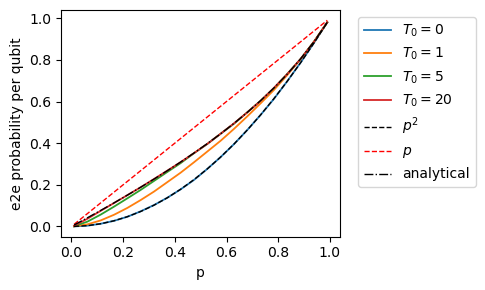

In [10]:
plt.figure(figsize=(5,3))
# plt.plot(p_list,rates,".")
for i_N,N0 in enumerate(N0_list):
    plt.plot(p_list,np.mean(rates[:,i_N,:],axis=1),"-",linewidth=1.3,label=r"$T_0=%d$" % (N0))
plt.plot(p_list,p_list**2,"k--",label=r"$p^2$",linewidth=1)
plt.plot(p_list,p_list,"r--",label=r"$p$",linewidth=1)
plt.plot(p_list,1/g2,"k-.",label="analytical",linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1.))
plt.xlabel("p")
plt.ylabel("e2e probability per qubit")
# plt.legend(loc="best",frameon=False)
plt.tight_layout()
plt.savefig("figs/heralding.pdf")
plt.show()   

# parallel vs. sequential

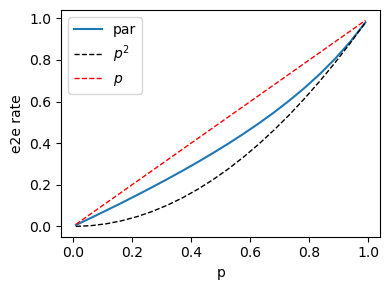

In [16]:
q_list = 1- p_list
g2 = ( (1+2*q_list)*p_list*(1-q_list**2)+(1+q_list)* (q_list*(1-q_list**2)+q_list**2 *p_list) )/(1-q_list**2)**2
plt.figure(figsize=(4,3))
plt.plot(p_list,1/g2, label = "par")
# plt.plot(p_list,p_list/2,label = "seq")
plt.plot(p_list,p_list**2,"k--",label=r"$p^2$",linewidth=1)
plt.plot(p_list,p_list,"r--",label=r"$p$",linewidth=1)
plt.legend(loc='upper left')#, bbox_to_anchor=(1.04, 1.))
plt.xlabel("p")
plt.ylabel("e2e rate")
plt.tight_layout()
plt.savefig("figs/parallel_one_memory.pdf")
plt.show()

In [192]:
# Nm memory

Nmc = 10000
p1 = 0.25
p2 = 0.1
N0 = 10
Nm = 20

def ent_rate_memory(p1,p2,Nm,N0,Nmc):
    # initial state of ebits
    m1_arr = np.zeros(Nm)
    m2_arr = np.zeros(Nm)
    t1_arr = np.zeros(Nm)
    t2_arr = np.zeros(Nm)

    ent = np.zeros(Nmc)
    for i_mc in range(Nmc):
        for i1 in range(len(m1_arr)):
            if m1_arr[i1] == 1:
                if t1_arr[i1] < N0:
                    t1_arr[i1] += 1
                else:
                    m1_arr[i1] = 0
                    t1_arr[i1] = 0
            if  m1_arr[i1] == 0:
                if np.random.rand() < p1:
                    m1_arr[i1] = 1
                    t1_arr[i1] = 0

        for i2 in range(len(m2_arr)):
            if m2_arr[i2] == 1:
                if t2_arr[i2] < N0:
                    t2_arr[i2] += 1
                else:
                    m2_arr[i2] = 0
                    t2_arr[i2] = 0
            if  m2_arr[i2] == 0:
                if np.random.rand() < p2:
                    m2_arr[i2] = 1
                    t2_arr[i2] = 0

        inds1 = np.argwhere(m1_arr==1)
        inds2 = np.argwhere(m2_arr==1)
        t1s = np.argwhere(t1_arr[inds1]<= N0)[:,0]
        t2s = np.argwhere(t2_arr[inds2]<= N0)[:,0]
        swap = min(len(t1s),len(t2s))
        ent[i_mc] = swap
    #     m1_arr *= 0 
    #     m2_arr *= 0 
    #     t1_arr *= 0 
    #     t2_arr *= 0 
        if swap>0:
    #         print(m1_arr,m2_arr)
    #         print(t1_arr,t2_arr)
            if len(t1s) <= len(t2s):
                m1_arr[inds1[t1s]] = 0
                t1_arr[inds1[t1s]] = 0
                i_swap = np.argsort( np.reshape(t2_arr[inds2[t2s]], (1,len(t2s))) )[::-1]
    #             print("t2=",t2_arr[inds2[t2s]])
    #             print("sw:",i_swap)
                zero2 = np.reshape(inds2[t2s[i_swap]],(len(t2s),))[:swap]
                m2_arr[ zero2] = 0
                t2_arr[ zero2] = 0
    #             print("i1:",inds1[t1s])
    #             print("i2:",zero2,"sw",swap)
            else:
                m2_arr[inds2[t2s]] = 0
                t2_arr[inds2[t2s]] = 0
                i_swap = np.argsort( np.reshape(t1_arr[inds1[t1s]], (1,len(t1s))) )[::-1]
    #             print("t1:",t1_arr[inds1[t1s]])
    #             print("sw:",i_swap)
                zero1 = np.reshape(inds1[t1s[i_swap]],(len(t1s),))[:swap]
                m1_arr[ zero1] = 0
                t1_arr[ zero1] = 0
    #             print("i1:",np.reshape(inds1[t1s[i_swap]],(1,swap))[:swap])
    #             print("i1:",zero1,"sw",swap)
    #             print("i2:",inds2[t2s])

    # plt.plot()
    return np.sum(ent)/Nmc/Nm
# print(eff_rate)
# plt.plot(ent)
# plt.show()

Nmc = 1000
# N0_list = [0,1,5,20,100]
N0 = 0
Nm_list = [1,5,20]
p_list = np.linspace(0.01,0.99,20)
Nrep = 20
rates = np.zeros((len(p_list),len(N0_list),Nrep))
# for i_N,Nm in enumerate(Nm_list):
#     for i_p,p in enumerate(p_list):
#         for i_r in range(Nrep):
#             rates[i_p,i_N,i_r] = ent_rate_memory(p,p,Nm,N0,Nmc)


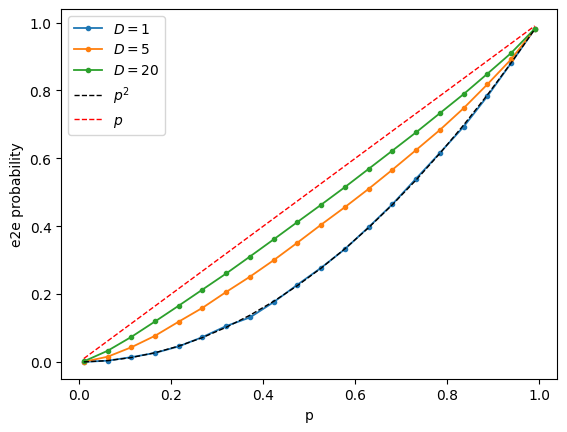

In [62]:
# plt.figure(figsize=(4,3))
# plt.plot(p_list,rates,".")
for i_N,Nm in enumerate(Nm_list):
    plt.plot(p_list,np.mean(rates[:,i_N,:],axis=1),".-",linewidth=1.3,label=r"$D=%d$" % Nm)
plt.plot(p_list,p_list**2,"k--",label=r"$p^2$",linewidth=1)
plt.plot(p_list,p_list,"r--",label=r"$p$",linewidth=1)
plt.xlabel("p")
plt.ylabel("e2e probability")
plt.legend(loc="best")
plt.show()

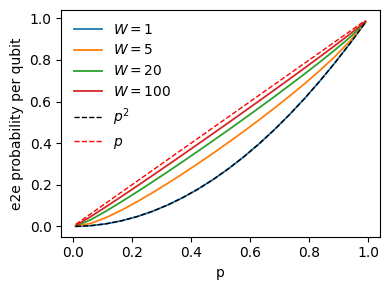

In [203]:
def ent_rate_memory_exact(p_list,Nm):
    # only works for N0=0
    prob = np.zeros(len(p_list))
    for i_p, p in enumerate(p_list):
        p1 = p
        p2 = p
        for i1 in range(Nm+1):
            for i2 in range(Nm+1):
                prob[i_p] += min(i1,i2)* comb(Nm,i1)* comb(Nm,i2) * p1**i1 * (1-p1)**(Nm-i1) * p2**i2 * (1-p2)**(Nm-i2) 
    return prob/Nm
plt.figure(figsize=(4,3))
# plt.plot(p_list,rates,".")
Nm_list = [1,5,20,100]
for i_N,Nm in enumerate(Nm_list):
    plt.plot(p_list,ent_rate_memory_exact(p_list,Nm),"-",linewidth=1.3,label=r"$W=%d$" % Nm)
plt.plot(p_list,p_list**2,"k--",label=r"$p^2$",linewidth=1)
plt.plot(p_list,p_list,"r--",label=r"$p$",linewidth=1)
plt.xlabel("p")
plt.ylabel("e2e probability per qubit")
plt.legend(loc="best",frameon=False)
plt.tight_layout()
plt.savefig("figs/multiplexing.pdf")
plt.show()   

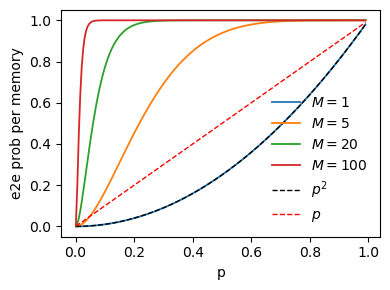

In [6]:
p_list = np.linspace(0.001,0.99,200)
M_list = [1,5,20,100]
plt.figure(figsize=(4,3))
for M in M_list:
#     vec = np.zeros(len(p_list))
#     for m in range(1,M+1):
#         vec += p_list*(1-p_list)**(m-1)/m
#     plt.plot(p_list, vec **2,"-",linewidth=1.3,label=r"$M=%d$" % M)
    plt.plot(p_list, (1-(1-p_list)**M)**2 ,"-",linewidth=1.3,label=r"$M=%d$" % M)
plt.plot(p_list,p_list**2,"k--",label=r"$p^2$",linewidth=1)
plt.plot(p_list,p_list,"r--",label=r"$p$",linewidth=1)
plt.xlabel("p")
plt.ylabel("e2e prob per memory") 
plt.legend(loc="best",frameon=False)
plt.tight_layout()
plt.savefig("figs/repeating.pdf")
plt.show()   

# chain with width w

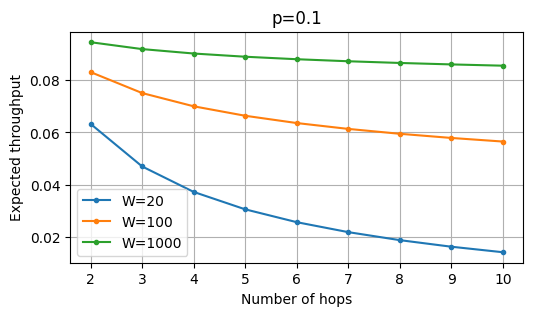

In [8]:

def ent_rate_memory_exact(p_list,q,W):
    N = len(p_list) # number of links (or number of repeaters -1)
    Q = np.zeros((W,N)) 
    for k, p_k in enumerate(p_list):
        for i in range(W):
            Q[i,k] = comb(W,i+1)* p_k**(i+1) * (1-p_k)**(W-i-1)

    P = np.zeros((W,N)) 
    P[:,0] = Q[:,0]     
    for k in range(1,N):
        for i in range(W):
            P[i,k] = P[i,k-1]* np.sum(Q[i:,k]) + Q[i,k]* np.sum(P[i+1:,k-1])

#     return np.sum(np.arange(1,W+1)*q**((N-1)*np.arange(1,W+1)) *P[:,N-1])
    return np.sum(np.arange(1,W+1)*P[:,N-1])


q = 1
p = 0.1
N_list = np.arange(2,11)
# W_list = [1,2,3]
# N_list = np.logspace(1,3,5).astype(int)
W_list = [20,100,1000]
Et = np.zeros((len(W_list),len(N_list)))
Et1 = np.zeros(len(W_list))
plt.figure(figsize=(5.85,3))
for i_W, W in enumerate(W_list):
    for i_N, N in enumerate(N_list):
        p_list = [p]*N
        Et[i_W,i_N] = ent_rate_memory_exact(p_list,q,W)
#         Et1[i_W] = np.sum([comb(W,i)*i* p**i * (1-p)**(W-i) for i in range(1,W+1)])
    plt.plot(N_list, Et[i_W,:]/W,".-",label="W=%d" % W)
# plt.plot([1]*len(W_list), Et1,"o")
# plt.plot(N_list, Et.T,".-")
# plt.plot(N_list, p**N_list,"k--")
# for W in W_list:
#     plt.plot(2,ent_rate_memory_exact([p],W)*W,"x")

# plt.ylim([0.0961,2.817])
plt.legend()
plt.grid()
plt.ylabel("Expected throughput")
plt.xlabel("Number of hops")
plt.title("p=%.1f" % p)
plt.show()

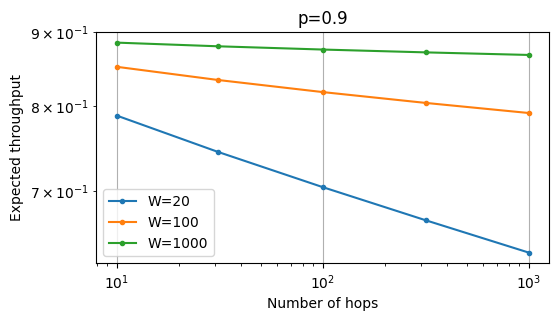

In [258]:
plt.figure(figsize=(5.85,3))
for i_W, W in enumerate(W_list):
    plt.plot(N_list, Et[i_W,:]/W,".-",label="W=%d" % W)
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.ylabel("Expected throughput")
plt.xlabel("Number of hops")
plt.title("p=%.1f" % p)
plt.show()

# MC simulation

In [177]:
# Nm memory

def ent_rate_memory_zero_lifetime(p,W,N,Nmc):
    # only works for N0=0
    m_arr = np.zeros((W,N))
    t_arr = np.zeros((W,N))
    ent = 0
    for i_mc in range(Nmc):    
        succ_links = np.sum(np.random.rand(W,N) < p,axis = 0) 
#         print(succ_links)
        ent += succ_links.min()
                    
    return ent/Nmc
# print(eff_rate)
# plt.plot(ent)
# plt.show()

Nmc = 1000
N0 = 0
W_list = [1,2,3]
N_list = np.arange(2,10)
p = 0.9
Nrep = 20
rates = np.zeros((len(W_list),len(N_list),Nrep))
for i_W, W in enumerate(W_list):
    for i_N, N in enumerate(N_list):
        for i_r in range(Nrep):
            rates[i_W,i_N,i_r] = ent_rate_memory_zero_lifetime(p,W,N,Nmc)



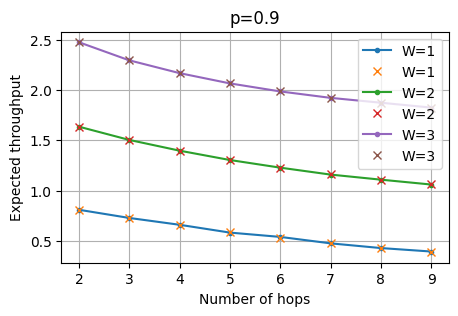

In [178]:
Et = np.zeros((len(W_list),len(N_list)))
plt.figure(figsize=(5,3))
for i_W, W in enumerate(W_list):
    plt.plot(N_list, np.mean(rates[i_W,:,:],axis=1),".-",label="W=%d" % W)

    for i_N, N in enumerate(N_list):
        p_list = [p]*N
        Et[i_W,i_N] = ent_rate_memory_exact(p_list,W)
    plt.plot(N_list, Et[i_W,:],"x",label="W=%d" % W)

plt.legend()
plt.grid()
plt.ylabel("Expected throughput")
plt.xlabel("Number of hops")
plt.title("p=%.1f" % p)
plt.show()

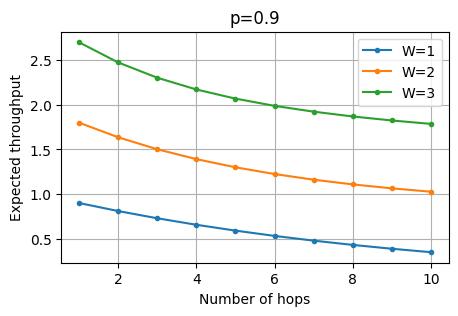

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from math import *


def ent_rate_memory(p_list,W):
    N = len(p_list) # number of links (or number of repeaters -1)
    Q = np.zeros((W+1,N+1)) 
    for k in range(1,N+1):
        p_k = p_list[k-1]
        for i in range(W+1):
            Q[i,k] = comb(W,i)* p_k**(i) * (1-p_k)**(W-i)
            
    P = np.zeros((W+1,N+1)) 
    P[:,1] = Q[:,1]     
    for k in range(2,N+1):
        for i in range(W+1):
            P[i,k] = P[i,k-1]* np.sum(Q[i:,k]) + Q[i,k]* np.sum(P[i+1:,k-1])

    return np.sum(np.arange(W+1)*P[:,N])

    
q = 1.0
p = 0.9
N_list = np.arange(1,11)
W_list = [1,2,3]
Et = np.zeros((len(W_list),len(N_list)))
plt.figure(figsize=(5,3))
for i_W, W in enumerate(W_list):
    for i_N, N in enumerate(N_list):
        p_list = [p]*N
        Et[i_W,i_N] = q**(N-1) * ent_rate_memory(p_list,W)
    plt.plot(N_list, Et[i_W,:],".-",label="W=%d" % W)
plt.legend()
plt.grid()
plt.ylabel("Expected throughput")
plt.xlabel("Number of hops")
plt.title("p=%.1f" % p)
plt.show()

## Gaussian approximation

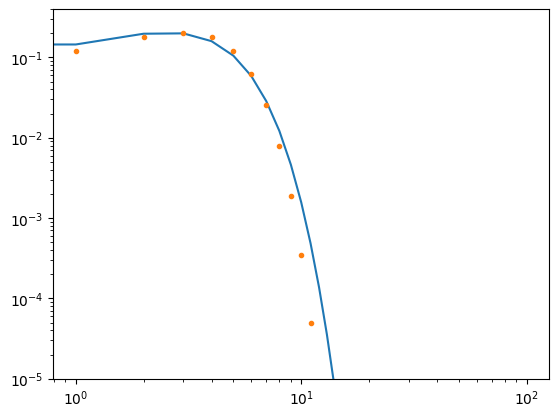

In [11]:
def binomial_dist(i,W,p_k):
#     return comb(W,i+1)* p_k**(i+1) * (1-p_k)**(W-i-1)
    return sp.special.gamma(W+1)/(sp.special.gamma(i+2)*sp.special.gamma(W-i))* p_k**(i+1) * (1-p_k)**(W-i-1)

def gaussian_dist(x,W,p_k):
    μ = W*p_k
    σ = np.sqrt(W*p_k*(1-p_k))
    return 1/(σ*sqrt(2*pi))*np.exp(-(x-μ)**2/σ**2/2)

p_k = 4e-2
W = 100
p_exact = np.zeros(W+1)
p_approx = np.zeros(W+1)
for i in range(W+1):
    p_exact[i]= binomial_dist(i,W,p_k)
    p_approx[i]= gaussian_dist(i+1,W,p_k)
    
plt.plot(np.arange(W+1),p_exact,"-")
plt.plot(np.arange(W+1),p_approx,".")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-5,4e-1)
plt.show()


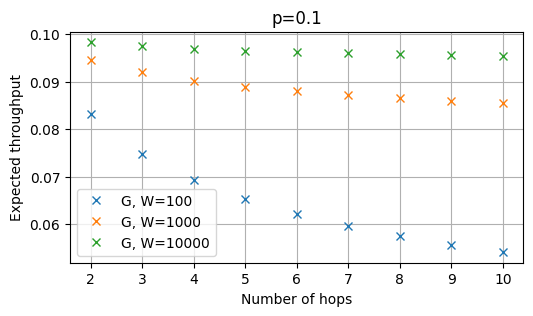

In [16]:

def ent_rate_memory(p_list,q,W,gaussian=False):
    N = len(p_list) # number of links (or number of repeaters -1)
    Q = np.zeros((W,N)) 
    for k, p_k in enumerate(p_list):
        for i in range(W):
            if gaussian:
                Q[i,k] = gaussian_dist(i+1,W,p_k)
            else:
                Q[i,k] = comb(W,i+1)* p_k**(i+1) * (1-p_k)**(W-i-1)

    P = np.zeros((W,N)) 
    P[:,0] = Q[:,0]     
    for k in range(1,N):
        for i in range(W):
            P[i,k] = P[i,k-1]* np.sum(Q[i:,k]) + Q[i,k]* np.sum(P[i+1:,k-1])

#     return np.sum(np.arange(1,W+1)*q**((N-1)*np.arange(1,W+1)) *P[:,N-1])
    return np.sum(np.arange(1,W+1)*P[:,N-1])


q = 1
p = 0.1
N_list = np.arange(2,11)
# W_list = [1,2,3]
# N_list = np.logspace(1,3,5).astype(int)
W_list = [100,1000,10000]
Et = np.zeros((len(W_list),len(N_list)))
Et_gauss = np.zeros((len(W_list),len(N_list)))
plt.figure(figsize=(5.85,3))
for i_W, W in enumerate(W_list):
    for i_N, N in enumerate(N_list):
        p_list = [p]*N
#         Et[i_W,i_N] = ent_rate_memory(p_list,q,W)
        Et_gauss[i_W,i_N] = ent_rate_memory(p_list,q,W,gaussian=True)
#     plt.plot(N_list, Et[i_W,:]/W,".-",label="W=%d" % W)
    plt.plot(N_list, Et_gauss[i_W,:]/W,"x",label="G, W=%d" % W)

# plt.ylim([0.0961,2.817])
plt.legend()
plt.grid()
plt.ylabel("Expected throughput")
plt.xlabel("Number of hops")
plt.title("p=%.1f" % p)
plt.show()

In [71]:
## random links
## checking if w*min(p_i) is valid

q = 1
W_list = np.arange(100,1601,100)
# W_list = [100,200,500,1000]
Nrep = 100
L_list = [5,10]
Et_gauss = np.zeros((Nrep,len(W_list),len(L_list)))
Et_approx = np.zeros((Nrep,len(W_list),len(L_list)))
for i_L, L in enumerate(L_list):
    for i_W, W in enumerate(W_list):
        for i_r in range(Nrep):
            p_list = 10**(-0.02*np.random.randint(10,20,L))

            Et_gauss[i_r,i_W,i_L] = ent_rate_memory(p_list,q,W,gaussian=True)
            Et_approx[i_r,i_W,i_L] = W*np.amin(p_list)
    


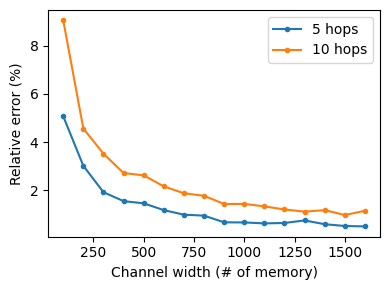

In [72]:
plt.figure(figsize=(4,3))
# plt.plot(W_list, -100*np.mean((Et_gauss-Et_approx)/Et_gauss,axis=0),".")
for i_L, L in enumerate(L_list):
    plt.plot(W_list, -100*(np.mean(Et_gauss[:,:,i_L],axis=0)-np.mean(Et_approx[:,:,i_L],axis=0))/np.mean(Et_gauss[:,:,i_L],axis=0),".-",label="%d hops" % L)

# plt.grid()
plt.legend()
plt.ylabel("Relative error (%)")
plt.xlabel("Channel width (# of memory)")
plt.tight_layout()
# plt.savefig("figs/min_approx.pdf")
plt.show()


In [23]:
W = 1000
L = 100
n1 = 2
l1 = L/n1
p1 = [10**(-0.2*(L/n1)/10)]*n1
print(p1[0],ent_rate_memory(p1,1,W,gaussian=True))
n2 = 3
p2 = [10**(-0.2*(L/n2)/10)]*n2
print(p2[0],ent_rate_memory(p2,1,W,gaussian=True))


0.1 94.65010629047819
0.21544346900318834 204.44358705639965
